In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
data.shape

(25, 2)

In [5]:
data["Hours"]

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

# Exploratory Data Analysis

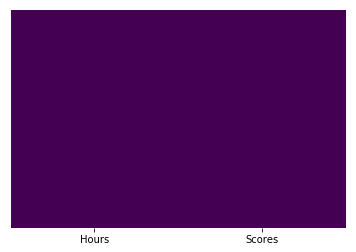

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

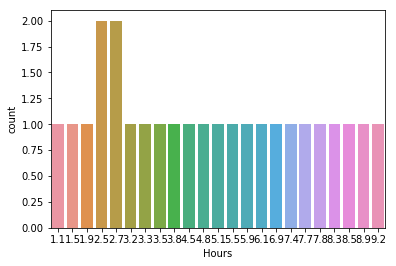

In [8]:
sns.countplot(x="Hours",data=data)

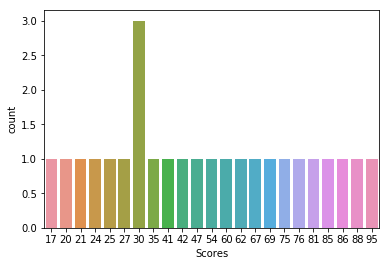

In [9]:
sns.countplot(data["Scores"])

# Data Gaussian distribution

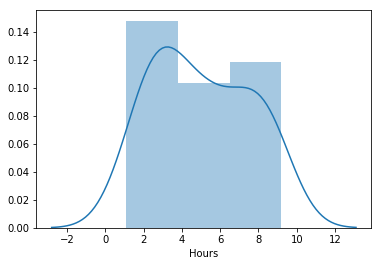

In [10]:
sns.distplot(data['Hours'])

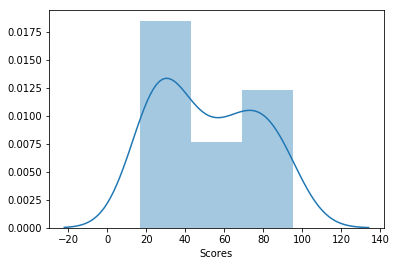

In [11]:
sns.distplot(data['Scores'])

# Find_Outliars

In [12]:
outliars=[]
def detect_outliar(data):
    threshold=3
    mean_age=np.mean(data)
    std_age=np.std(data)
    
    for v in data:
        z_score=(v-mean_age)/std_age
        if z_score > threshold:
            outliars.append(v)
            
    return outliars

In [13]:
detect_outliar(data["Hours"])

[]

In [14]:
detect_outliar(data["Scores"])

[]

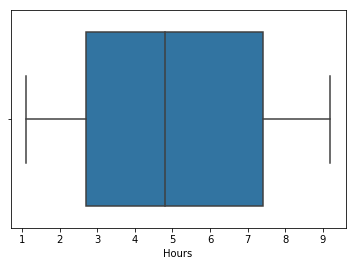

In [15]:
sns.boxplot(data['Hours'])

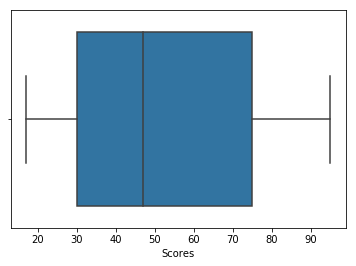

In [16]:
sns.boxplot(data['Scores'])

# Feature_Selection

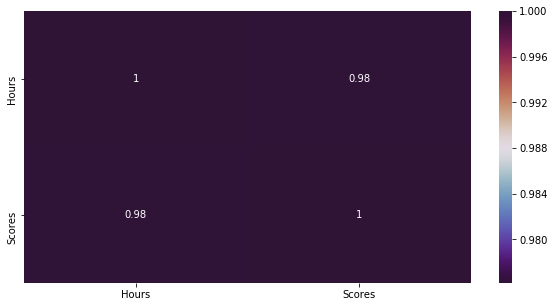

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="twilight_shifted")

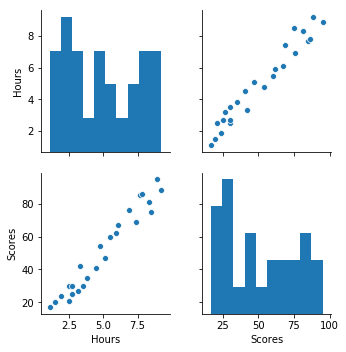

In [18]:
sns.pairplot(data)

# Model_Create

In [19]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [20]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
Reg=LinearRegression()
Reg.fit(train_x,train_y)
pred_y=Reg.predict(test_x)

In [22]:
test_y[4]

62

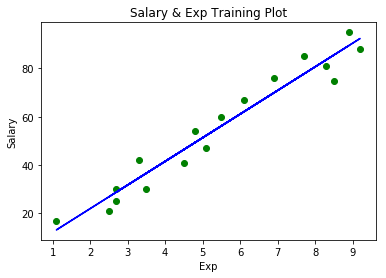

In [23]:
plt.scatter(train_x,train_y,color="green")
plt.plot(train_x,Reg.predict(train_x),color="blue")
plt.title("Salary & Exp Training Plot")
plt.xlabel("Exp")
plt.ylabel("Salary")
plt.show()

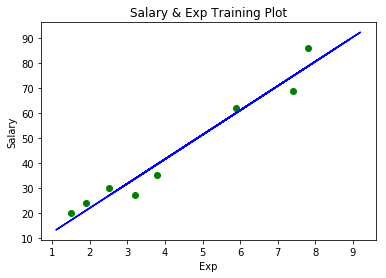

In [24]:
plt.scatter(test_x,test_y,color="green")
plt.plot(train_x,Reg.predict(train_x),color="blue")
plt.title("Salary & Exp Training Plot")
plt.xlabel("Exp")
plt.ylabel("Salary")
plt.show()

In [25]:
print("Traning Accuracy:",Reg.score(train_x,train_y)*100)
print("Testing Accuracy:",Reg.score(test_x,test_y)*100)

Traning Accuracy: 94.84997422695115
Testing Accuracy: 95.68211104435257


Question<br>What will be predicted score if a student study for 9.25 hrs in a
day?

In [27]:
hours=[[9.25]]
own_pred=Reg.predict(hours)
print("No of hours ={} ".format(hours))
print("Predicted Score ={} ".format(own_pred))


No of hours =[[9.25]] 
Predicted Score =[92.91505723] 
